# Data validation for MCMC use

In [2]:
'''
    WARNING CONTROL to display or ignore all warnings
'''
import warnings; warnings.simplefilter('ignore')     #switch betweeb 'default' and 'ignore'
import traceback

''' Set debug flag to view extended error messages; else set it to False to turn off debugging mode '''
debug = True

When using Markov Chain Monte Carlo (MCMC) for generating a representative sample, there are several important criteria and characteristics of your training data you should check:

1. **Stationarity** - Your data should come from a stationary distribution. Time series data should not have trends or seasonality that would affect the underlying distribution you're trying to sample from.
2. **Sufficient data volume** - You need enough data to accurately estimate the target distribution. Sparse datasets can lead to poor MCMC performance.
3. **Representativeness** - Your training data should adequately cover the full distribution you're trying to sample from, including rare events or edge cases.
4. **Dimensionality** - Consider the dimensionality of your problem. High-dimensional spaces can suffer from the "curse of dimensionality," making MCMC less efficient.

5. **Correlation structure** - Understand the correlation structure in your data. Highly correlated variables can slow down MCMC convergence.
6. **Multimodality** - Check if your distribution has multiple modes. Multimodal distributions can trap MCMC chains in local optima.
7. **Boundary conditions** - Verify if your parameter space has constraints or boundaries that need special handling in your MCMC implementation.
8. **Mixing properties** - Data that leads to good "mixing" properties is ideal for MCMC. Poor mixing means your chain takes longer to explore the full distribution.
9. **Prior knowledge** - Consider whether you have reliable prior information that can be incorporated into your MCMC approach.
10. **Noise characteristics** - Understand the noise profile in your data, as this affects how you should set up your MCMC sampler.

In [180]:
import os
import sys
import numpy as np
from pyspark.sql import functions as F

proj_dir = os.path.abspath(os.pardir)
sys.path.insert(1,proj_dir.split('mining/')[0])
# from rezaware.modules.etl.loader import sparkRDBM as db
# from rezaware.modules.etl.loader import sparkFile as file
from mining.modules.budget.evaluation import __propAttr__ as attr
from mining.modules.budget.evaluation import mcmcDataCompliance as mcmc

''' restart initiate classes '''
if debug:
    import importlib
    mcmc = importlib.reload(mcmc)
    # file=importlib.reload(file)
    attr=importlib.reload(attr)

__desc__ = "MCMC data compliance tests"
''' class to read/write file data '''
clsFile = file.dataWorkLoads(
    desc = "optimizing action_type budgets for an ad",
    f_store_mode='local-fs',
    f_store_root=proj_dir.split('mining/')[0],
    jar_dir=None,
)
''' class to run the compliance tests '''
clsTest = mcmc.dataWorkLoads(
    desc=__desc__,
    f_store_mode='local-fs',
    f_store_root=proj_dir.split('mining/')[0],
)
# if clsSDB.session:
#     clsSDB._session.stop
print("\n%s class initialization and load complete!" % __desc__)

All functional MCMCDATACOMPLIANCE-libraries in EVALUATION-package of BUDGET-module imported successfully!
All functional __PROPATTR__-libraries in EVALUATION-package of BUDGET-module imported successfully!
__propAttr__ Class initialization complete
__propAttr__ Class initialization complete
sparkFile Class initialization complete
rwAdsData Class initialization complete
__propAttr__ Class initialization complete
mcmcDataCompliance Class initialization complete

MCMC data compliance tests class initialization and load complete!


In [181]:
_drop_cols = ['updated_time', 'objective', 'account_currency', 'business_country_code', 
              'business_city', 'business_state', 'timezone_name', 'account_id', 'ad_id',
              'adset_id', 'd1_view', 'd7_view', 'd28_view', 'd1_click', 'd7_click', 
              'd28_click',
             ]
#['stationarity', 'data volume', 'representativeness', 'dimensionality', ]
_check_lst = ['correlation structure'] 

test_results = clsTest.run_checks(
    data = sdf.drop(*_drop_cols),
    checks= _check_lst,
    multivariate=True,
    time_series =True
)
test_results

running CORRELATION STRUCTURE CHECK ...

Finished running checks!


[{'check': 'correlation structure',
  'comply': False,
  'plot': <Figure size 1000x800 with 2 Axes>,
  'data':           0         1         2         3         4         5         6   \
  0   1.000000  0.032575 -0.166128  0.045842  0.054327 -0.016758 -0.261466   
  1   0.032575  1.000000  0.051876  0.995140 -0.085085 -0.035096  0.071331   
  2  -0.166128  0.051876  1.000000  0.024410 -0.148322  0.149062  0.424218   
  3   0.045842  0.995140  0.024410  1.000000 -0.079521 -0.044122  0.053181   
  4   0.054327 -0.085085 -0.148322 -0.079521  1.000000  0.094327 -0.243306   
  5  -0.016758 -0.035096  0.149062 -0.044122  0.094327  1.000000  0.533318   
  6  -0.261466  0.071331  0.424218  0.053181 -0.243306  0.533318  1.000000   
  7   0.026763 -0.044538 -0.005651 -0.048568  0.124534  0.979925  0.461860   
  8  -0.092980  0.632320  0.090573  0.614801 -0.081235  0.202805  0.289699   
  9   0.096122  0.700166 -0.006484  0.719495  0.051494 -0.036055 -0.049242   
  10  0.015234  0.007633  0.02086

## Run to plot

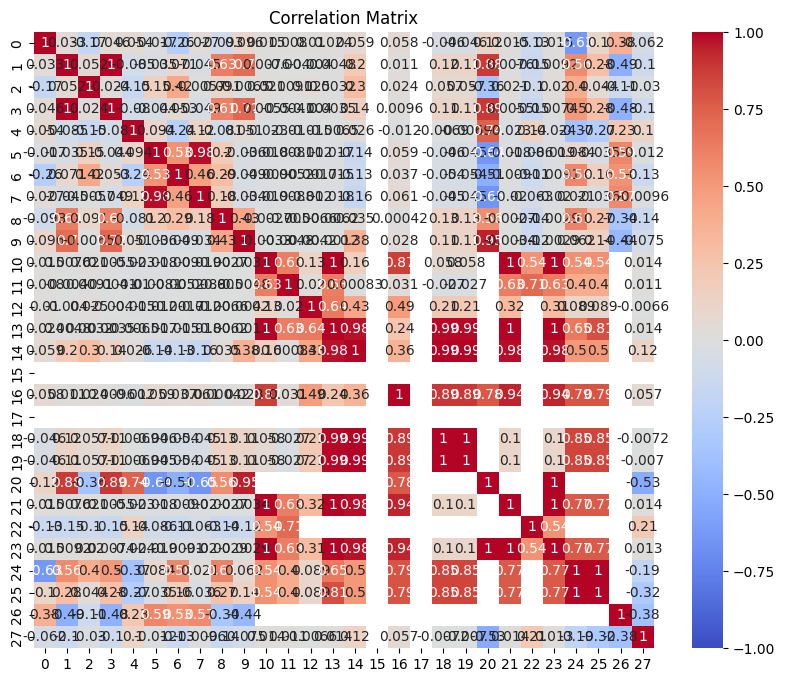

In [179]:
from IPython.display import display
display(test_results[0]['plot'])
plt.figure(test_results[0]['plot'].number)  # Make the figure active
plt.show()  # Display it

In [21]:
_fpath = "mining/data/budget/"
_fname = "FullDataset.csv"

__def_date_attr__="updated_time"
__def_realm__='OBJECTIVE'
__def_obj__ = 'OUTCOME_LEADS'

kwargs = {
    "REALMFILTATTR" : 'objective',
    "REALMFILTLIST" : [__def_obj__],
    "UNIXTIMESTAMP" : __def_date_attr__,
}
sdf = clsFile.read_realm(
    realm = __def_realm__,
    to_date = None,
    from_date=None,
    fname = _fname,
    fpath = _fpath,
    **kwargs,
)
print("Loaded %s %d rows" % (_fname, sdf.count()))# sdf.printSchema()


25/03/07 12:31:40 WARN Utils: Your hostname, Waidy-Think-Three resolves to a loopback address: 127.0.1.1; using 192.168.2.82 instead (on interface enp0s25)
25/03/07 12:31:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
25/03/07 12:31:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/03/07 12:32:41 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
[Stage 425:=============================================>           (4 + 1) / 5]

Loaded FullDataset.csv 58280 rows


In [174]:
sdf.printSchema()

root
 |-- account_id: long (nullable = true)
 |-- ad_id: long (nullable = true)
 |-- adset_id: long (nullable = true)
 |-- campaign_id: long (nullable = true)
 |-- updated_time: date (nullable = true)
 |-- impressions: integer (nullable = true)
 |-- frequency: double (nullable = true)
 |-- reach: integer (nullable = true)
 |-- CTR: double (nullable = true)
 |-- CPP: double (nullable = true)
 |-- CPC: double (nullable = true)
 |-- CPM: double (nullable = true)
 |-- spend: double (nullable = true)
 |-- clicks: integer (nullable = true)
 |-- objective: string (nullable = true)
 |-- account_currency: string (nullable = true)
 |-- business_country_code: string (nullable = true)
 |-- business_city: string (nullable = true)
 |-- business_state: string (nullable = true)
 |-- timezone_name: string (nullable = true)
 |-- d1_view: double (nullable = true)
 |-- d7_view: double (nullable = true)
 |-- d28_view: double (nullable = true)
 |-- d1_click: double (nullable = true)
 |-- d7_click: double (n

===== ANALYZING UNIVARIATE TIME SERIES DATA =====

==== 1. STATIONARITY CHECK ====
ADF Test p-value: 1.8233018269769777e-07
✓ Data appears to be stationary

==== 2. DATA VOLUME CHECK ====
Number of samples: 1000
✓ Data volume is likely sufficient (>= 1000 samples)

==== 3. REPRESENTATIVENESS CHECK ====


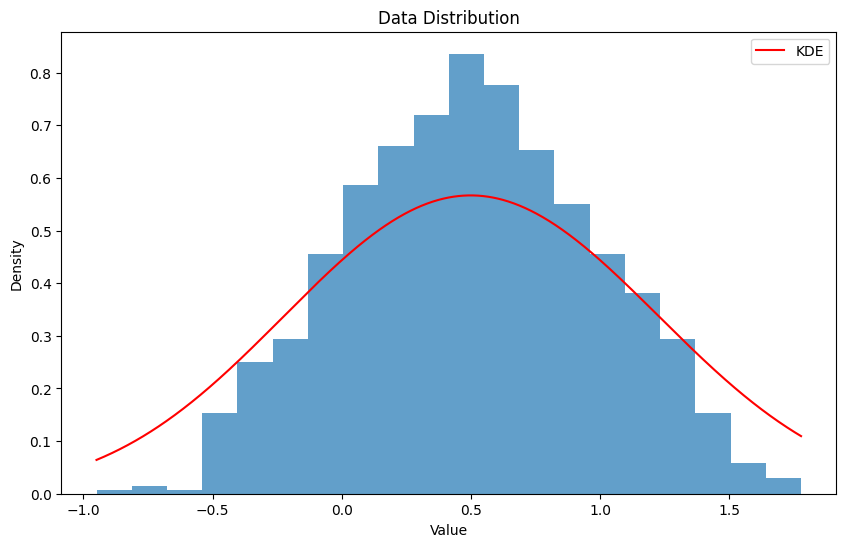

✓ No empty regions found in the distribution
Note: Visual inspection is recommended to ensure representativeness

==== 4. DIMENSIONALITY CHECK ====
Data dimensionality: 1
✓ Dimensionality is manageable for standard MCMC

==== 5. CORRELATION STRUCTURE CHECK ====


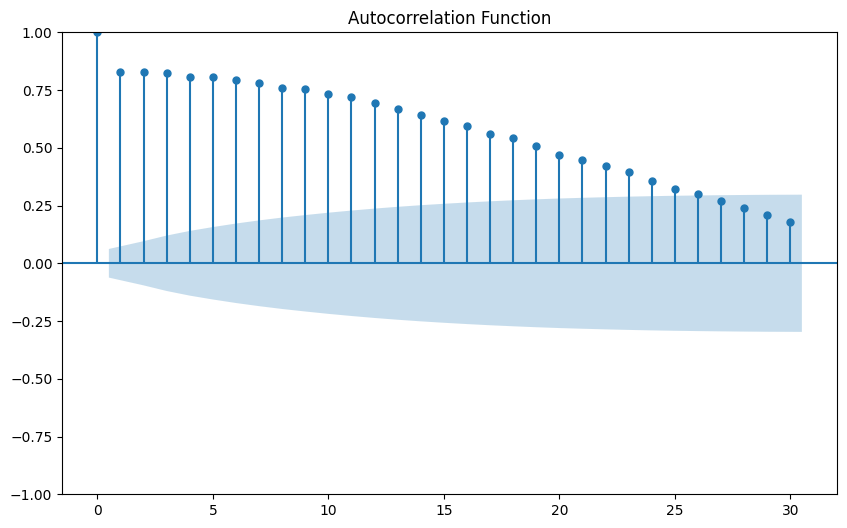

✗ Significant autocorrelation detected at 30 lags
  High autocorrelation may slow MCMC convergence

==== 6. MULTIMODALITY CHECK ====


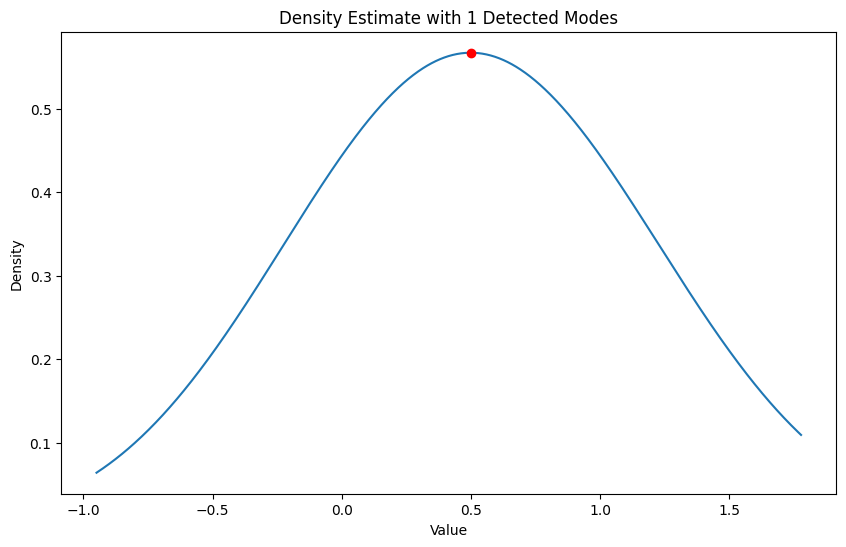

✓ Distribution appears to be unimodal

==== 7. BOUNDARY CONDITIONS CHECK ====
Potential boundary conditions:
Data range: [-0.9490290258795089, 1.777931446831389]
✗ Data contains values very close to 1
  Boundary constraints may require specialized MCMC

==== 8. MIXING PROPERTIES CHECK ====


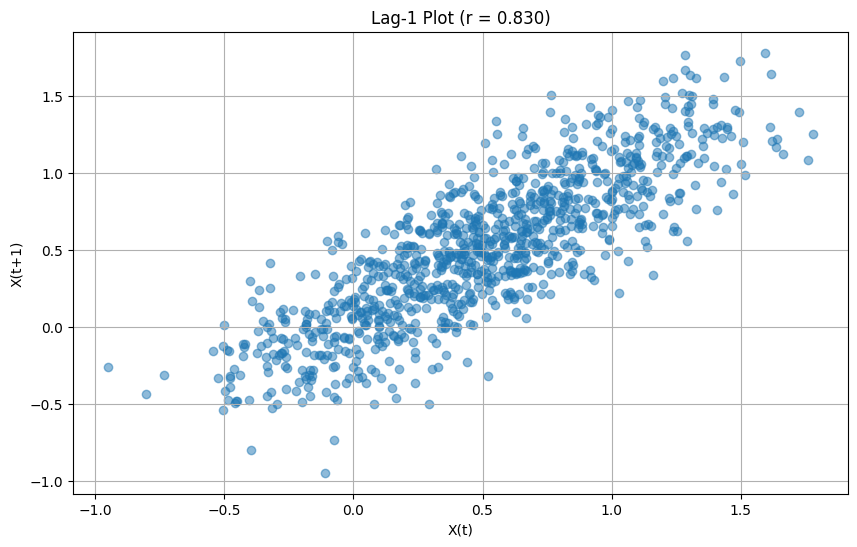

✗ High lag-1 autocorrelation detected: 0.830
  High autocorrelation may lead to poor mixing
  Consider:
  - Thinning your MCMC chain
  - Using longer burn-in periods
  - More efficient MCMC samplers (HMC, NUTS)

==== 9. PRIOR KNOWLEDGE CHECK ====


TypeError: _parse_args() missing 1 required positional argument: 'df'

In [1]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import scipy.stats as stats
# from statsmodels.tsa.stattools import adfuller, acf
# from statsmodels.graphics.tsaplots import plot_acf
# from sklearn.neighbors import KernelDensity
# from scipy.signal import find_peaks
# import seaborn as sns
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler


def check_stationarity(data, significance=0.05):
    """
    Test for stationarity using Augmented Dickey-Fuller test.
    
    Parameters:
    -----------
    data : array-like
        Time series data to test
    significance : float
        Significance level for the test
        
    Returns:
    --------
    bool
        True if stationary, False otherwise
    """
    result = adfuller(data)
    p_value = result[1]
    print(f"ADF Test p-value: {p_value}")
    
    if p_value < significance:
        print("✓ Data appears to be stationary")
        return True
    else:
        print("✗ Data does not appear to be stationary")
        return False


def check_data_volume(data, min_samples=1000):
    """
    Check if there is sufficient data volume.
    
    Parameters:
    -----------
    data : array-like
        Data to test
    min_samples : int
        Minimum recommended sample size
        
    Returns:
    --------
    bool
        True if sufficient, False otherwise
    """
    n_samples = len(data)
    print(f"Number of samples: {n_samples}")
    
    if n_samples >= min_samples:
        print(f"✓ Data volume is likely sufficient (>= {min_samples} samples)")
        return True
    else:
        print(f"✗ Data volume may be insufficient (< {min_samples} samples)")
        return False


def check_representativeness(data, n_bins=20):
    """
    Visualize the distribution to check for representativeness.
    This is somewhat subjective and depends on domain knowledge.
    
    Parameters:
    -----------
    data : array-like
        Data to test
    n_bins : int
        Number of bins for histogram
    """
    plt.figure(figsize=(10, 6))
    
    # Plot histogram
    plt.hist(data, bins=n_bins, alpha=0.7, density=True)
    
    # Plot kernel density estimate
    x_grid = np.linspace(min(data), max(data), 1000)
    kde = KernelDensity(bandwidth=0.5).fit(data.reshape(-1, 1))
    log_dens = kde.score_samples(x_grid.reshape(-1, 1))
    plt.plot(x_grid, np.exp(log_dens), 'r-', label='KDE')
    
    plt.title('Data Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.show()
    
    # Check for zeros in the histogram bins
    hist, bin_edges = np.histogram(data, bins=n_bins)
    empty_bins = np.sum(hist == 0)
    
    if empty_bins > 0:
        print(f"✗ Found {empty_bins} empty regions in the distribution out of {n_bins} bins")
        print("  This might indicate gaps in your data's coverage")
    else:
        print("✓ No empty regions found in the distribution")
        
    print("Note: Visual inspection is recommended to ensure representativeness")


def check_dimensionality(data, max_recommended_dim=20):
    """
    Check the dimensionality of the data and provide guidance.
    
    Parameters:
    -----------
    data : array-like
        Data to test, should be 2D (samples x features)
    max_recommended_dim : int
        Maximum recommended dimensionality for standard MCMC
        
    Returns:
    --------
    bool
        True if dimensionality is manageable, False otherwise
    """
    if len(data.shape) == 1:
        n_dim = 1
    else:
        n_dim = data.shape[1]
    
    print(f"Data dimensionality: {n_dim}")
    
    if n_dim <= max_recommended_dim:
        print(f"✓ Dimensionality is manageable for standard MCMC")
        return True
    else:
        print(f"✗ High dimensionality detected. Consider:")
        print("  - Dimensionality reduction techniques")
        print("  - Specialized MCMC methods for high dimensions")
        print("  - Hamiltonian Monte Carlo")
        return False


def check_correlation_structure(data):
    """
    Analyze the correlation structure of the data.
    
    Parameters:
    -----------
    data : array-like
        Data to test, should be 2D (samples x features)
    """
    if len(data.shape) == 1:
        # For 1D data, show autocorrelation
        fig, ax = plt.subplots(figsize=(10, 6))
        plot_acf(data, ax=ax, lags=30)
        plt.title('Autocorrelation Function')
        plt.show()
        
        # Check for significant autocorrelation
        acf_values = acf(data, nlags=30)
        significant_lags = np.sum(np.abs(acf_values[1:]) > 1.96/np.sqrt(len(data)))
        
        if significant_lags > 5:
            print(f"✗ Significant autocorrelation detected at {significant_lags} lags")
            print("  High autocorrelation may slow MCMC convergence")
        else:
            print("✓ Autocorrelation appears manageable")
    else:
        # For multivariate data, show correlation matrix
        df = pd.DataFrame(data)
        corr_matrix = df.corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()
        
        # Count high correlations
        high_corr_count = np.sum(np.abs(np.triu(corr_matrix.values, k=1)) > 0.7)
        
        if high_corr_count > 0:
            print(f"✗ Found {high_corr_count} pairs of highly correlated variables")
            print("  High correlation may slow MCMC convergence")
        else:
            print("✓ Correlation structure appears manageable")


def check_multimodality(data, bandwidth=0.5, prominence=0.05):
    """
    Check if the distribution appears to be multimodal.
    
    Parameters:
    -----------
    data : array-like
        Data to test
    bandwidth : float
        Bandwidth for kernel density estimation
    prominence : float
        Minimum prominence of peaks to be considered
        
    Returns:
    --------
    bool
        True if multimodal, False otherwise
    """
    # Create a KDE of the data
    x_grid = np.linspace(min(data), max(data), 1000)
    kde = KernelDensity(bandwidth=bandwidth).fit(data.reshape(-1, 1))
    log_dens = kde.score_samples(x_grid.reshape(-1, 1))
    density = np.exp(log_dens)
    
    # Find peaks in the density
    peaks, properties = find_peaks(density, prominence=prominence)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x_grid, density)
    plt.plot(x_grid[peaks], density[peaks], 'ro')
    plt.title(f'Density Estimate with {len(peaks)} Detected Modes')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()
    
    if len(peaks) > 1:
        print(f"✗ Distribution appears to be multimodal with {len(peaks)} modes")
        print("  Multimodal distributions may require:")
        print("  - Longer MCMC chains")
        print("  - Multiple chains with different starting points")
        print("  - Tempering methods")
        return True
    else:
        print("✓ Distribution appears to be unimodal")
        return False


def check_boundary_conditions(data):
    """
    Check for boundary conditions or constraints in the data.
    
    Parameters:
    -----------
    data : array-like
        Data to test
    """
    # Check for common boundary types
    min_val = np.min(data)
    max_val = np.max(data)
    
    # Calculate distance from min/max to next closest points
    sorted_data = np.sort(data)
    min_gap = np.min(np.diff(sorted_data))
    
    # Check if data is close to 0, 1, or other common boundaries
    boundaries = {
        '0': 0,
        '1': 1,
        'Integer values': np.all(data == np.round(data))
    }
    
    print("Potential boundary conditions:")
    print(f"Data range: [{min_val}, {max_val}]")
    
    for name, value in boundaries.items():
        if name == 'Integer values':
            if value:
                print(f"✗ Data appears to be discrete (integer-valued)")
                print("  Discrete parameters require special MCMC approaches")
        else:
            if np.any(np.isclose(data, value, atol=min_gap)):
                print(f"✗ Data contains values very close to {name}")
                print("  Boundary constraints may require specialized MCMC")
    
    # Check for potential truncation
    if np.isclose(min_val, max_val - (max_val - min_val) * 0.05, atol=min_gap) or \
       np.isclose(max_val, min_val + (max_val - min_val) * 0.05, atol=min_gap):
        print("✗ Data may be truncated (high concentration at extremes)")
        print("  Truncated distributions require special handling")


def check_mixing_properties(data, lag=1):
    """
    For time series data, check properties that might affect mixing.
    
    Parameters:
    -----------
    data : array-like
        Time series data to test
    lag : int
        Lag for checking autocorrelation
    """
    # Calculate autocorrelation
    acf_1 = acf(data, nlags=lag)[-1]
    
    plt.figure(figsize=(10, 6))
    plt.scatter(data[:-lag], data[lag:], alpha=0.5)
    plt.title(f'Lag-{lag} Plot (r = {acf_1:.3f})')
    plt.xlabel(f'X(t)')
    plt.ylabel(f'X(t+{lag})')
    plt.grid(True)
    plt.show()
    
    if abs(acf_1) > 0.7:
        print(f"✗ High lag-{lag} autocorrelation detected: {acf_1:.3f}")
        print("  High autocorrelation may lead to poor mixing")
        print("  Consider:")
        print("  - Thinning your MCMC chain")
        print("  - Using longer burn-in periods")
        print("  - More efficient MCMC samplers (HMC, NUTS)")
    else:
        print(f"✓ Lag-{lag} autocorrelation is moderate: {acf_1:.3f}")
        print("  Mixing properties look reasonable")


def check_prior_knowledge(data):
    """
    Evaluate if the data aligns with common distributions
    to help with prior selection.
    
    Parameters:
    -----------
    data : array-like
        Data to test
    """
    # Normalize data for distribution testing
    data_norm = (data - np.mean(data)) / np.std(data)
    
    # List of distributions to test
    distributions = [
        ('Normal', stats.norm),
        ('Student-t', stats.t),
        ('Cauchy', stats.cauchy),
        ('Laplace', stats.laplace),
        ('Logistic', stats.logistic)
    ]
    
    # Perform Kolmogorov-Smirnov tests
    results = []
    for name, dist in distributions:
        statistic, p_value = stats.kstest(data_norm, dist.cdf)
        results.append((name, p_value, statistic))
    
    # Sort by p-value (higher is better fit)
    results.sort(key=lambda x: x[1], reverse=True)
    
    print("Distribution fitting results (higher p-value = better fit):")
    for name, p_value, statistic in results:
        print(f"  {name}: p-value = {p_value:.4f}, KS statistic = {statistic:.4f}")
    
    # Suggest priors based on best fit
    best_dist = results[0][0]
    print(f"\nBased on your data, consider priors related to the {best_dist} distribution")
    
    if results[0][1] < 0.05:
        print("✗ No common distribution fits well (all p-values < 0.05)")
        print("  Consider non-parametric or mixture priors")
    else:
        print(f"✓ {best_dist} distribution is a reasonable fit (p-value > 0.05)")


def check_noise_characteristics(data):
    """
    Analyze noise characteristics in the data.
    
    Parameters:
    -----------
    data : array-like
        Data to test
    """
    # Calculate differences to examine noise
    diffs = np.diff(data)
    
    # Test for heteroskedasticity (changing variance)
    window_size = min(100, len(diffs) // 5)
    rolling_std = pd.Series(diffs).rolling(window=window_size).std().dropna()
    
    plt.figure(figsize=(10, 8))
    
    # Plot 1: Original data
    plt.subplot(3, 1, 1)
    plt.plot(data)
    plt.title('Original Data')
    plt.grid(True)
    
    # Plot 2: Differences
    plt.subplot(3, 1, 2)
    plt.plot(diffs)
    plt.title('First Differences (Noise)')
    plt.grid(True)
    
    # Plot 3: Rolling standard deviation
    plt.subplot(3, 1, 3)
    plt.plot(rolling_std)
    plt.title('Rolling Standard Deviation of Noise')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # QQ plot to check noise normality
    plt.figure(figsize=(8, 8))
    stats.probplot(diffs, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Noise')
    plt.grid(True)
    plt.show()
    
    # Test for heteroskedasticity
    std_ratio = np.max(rolling_std) / np.min(rolling_std)
    
    if std_ratio > 2:
        print(f"✗ Heteroskedasticity detected (std ratio: {std_ratio:.2f})")
        print("  Consider:")
        print("  - Transformation to stabilize variance")
        print("  - MCMC methods that account for varying noise")
    else:
        print(f"✓ Noise appears homoskedastic (std ratio: {std_ratio:.2f})")
    
    # Test for normality of noise
    _, p_value = stats.normaltest(diffs)
    
    if p_value < 0.05:
        print(f"✗ Noise is not normally distributed (p-value: {p_value:.4f})")
        print("  Consider MCMC likelihood functions that match your noise distribution")
    else:
        print(f"✓ Noise appears normally distributed (p-value: {p_value:.4f})")


def run_all_checks(data, multivariate=False, time_series=True):
    """
    Run all MCMC suitability checks on the data.
    
    Parameters:
    -----------
    data : array-like
        Data to test
    multivariate : bool
        Whether the data is multivariate (2D array)
    time_series : bool
        Whether the data should be treated as time series
    """
    data = np.asarray(data)
    
    # Ensure data is in the right format
    if multivariate and len(data.shape) == 1:
        data = data.reshape(-1, 1)
        print("Warning: Data was reshaped to 2D for multivariate analysis")
    
    # Run all checks
    print("\n==== 1. STATIONARITY CHECK ====")
    if time_series:
        check_stationarity(data if len(data.shape) == 1 else data[:, 0])
    else:
        print("Skipped (not time series data)")
    
    print("\n==== 2. DATA VOLUME CHECK ====")
    check_data_volume(data)
    
    print("\n==== 3. REPRESENTATIVENESS CHECK ====")
    if multivariate:
        # For multivariate data, we'll use PCA for visualization
        scaler = StandardScaler()
        data_scaled = scaler.fit_transform(data)
        pca = PCA(n_components=1)
        data_pca = pca.fit_transform(data_scaled).flatten()
        print("Note: Using PCA first component for representativeness visualization")
        check_representativeness(data_pca)
    else:
        check_representativeness(data)
    
    print("\n==== 4. DIMENSIONALITY CHECK ====")
    check_dimensionality(data)
    
    print("\n==== 5. CORRELATION STRUCTURE CHECK ====")
    check_correlation_structure(data)
    
    print("\n==== 6. MULTIMODALITY CHECK ====")
    if multivariate:
        print("For multivariate data, checking first PCA component")
        check_multimodality(data_pca)
    else:
        check_multimodality(data)
    
    print("\n==== 7. BOUNDARY CONDITIONS CHECK ====")
    if multivariate:
        print("Checking each dimension separately:")
        for i in range(data.shape[1]):
            print(f"\nDimension {i+1}:")
            check_boundary_conditions(data[:, i])
    else:
        check_boundary_conditions(data)
    
    print("\n==== 8. MIXING PROPERTIES CHECK ====")
    if time_series:
        if multivariate:
            print("Checking first dimension for mixing properties:")
            check_mixing_properties(data[:, 0])
        else:
            check_mixing_properties(data)
    else:
        print("Skipped (not time series data)")
    
    print("\n==== 9. PRIOR KNOWLEDGE CHECK ====")
    if multivariate:
        print("Checking each dimension separately:")
        for i in range(min(3, data.shape[1])):  # Limit to first 3 dimensions
            print(f"\nDimension {i+1}:")
            check_prior_knowledge(data[:, i])
    else:
        check_prior_knowledge(data)
    
    print("\n==== 10. NOISE CHARACTERISTICS CHECK ====")
    if time_series:
        if multivariate:
            print("Checking first dimension for noise characteristics:")
            check_noise_characteristics(data[:, 0])
        else:
            check_noise_characteristics(data)
    else:
        print("Skipped (not time series data)")


# Example usage
if __name__ == "__main__":
    # Generate some example data
    np.random.seed(42)
    
    # Example 1: Univariate time series with some non-stationarity
    t = np.linspace(0, 10, 1000)
    trend = 0.1 * t
    seasonal = 0.5 * np.sin(2 * np.pi * t)
    noise = 0.2 * np.random.randn(len(t))
    example_ts = trend + seasonal + noise
    
    # Example 2: Multivariate data with correlation
    n_samples = 1000
    cov_matrix = np.array([[1.0, 0.7], [0.7, 1.0]])
    example_mv = np.random.multivariate_normal(mean=[0, 0], cov=cov_matrix, size=n_samples)
    
    # Example 3: Bimodal distribution
    component1 = np.random.normal(-2, 0.5, 500)
    component2 = np.random.normal(2, 0.5, 500)
    example_bimodal = np.concatenate([component1, component2])
    
    print("===== ANALYZING UNIVARIATE TIME SERIES DATA =====")
    run_all_checks(example_ts, multivariate=False, time_series=True)
    
    print("\n\n===== ANALYZING MULTIVARIATE DATA =====")
    run_all_checks(example_mv, multivariate=True, time_series=False)
    
    print("\n\n===== ANALYZING BIMODAL DISTRIBUTION =====")
    run_all_checks(example_bimodal, multivariate=False, time_series=False)